# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.

# Le projet speed dating consiste à faire une analyse descriptive d'un jeu de données avec plusieurs variables dont l'objectif est de comprendre ce qui se passe dans un speed dating et déterminer les pricipaux facteurs qui influencent l'obtention d'un deuxième rendez-vous. 

## I. La data
## 1. Importation des librairies :

In [1]:
#!pip install plotly
#!pip install -U kaleido

import sys
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

## 2. Chargement du fichier CSV en dataset

In [2]:
dataset =pd.read_csv("Speed Dating Data.csv", encoding = "latin1")  
#  aperçu du dataset
display(dataset)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


## 3. lister les colonnes du DS

In [3]:
dataset.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

## 4. Apeçu des statistiques du DS

In [4]:
dataset.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


## 5. Garder que les iid uniques des paticipants

In [5]:
dataset1 = dataset.drop_duplicates(subset='iid', keep="first")
dataset1.head(3)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,0,3,1,1,10,3,NaN,10,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
20,3,3.0,0,5,1,1,10,9,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# II. Description et caractérisation de la population d'étude.

## 1. Selon le sexe :

In [6]:
dataset1["gender"] = dataset.gender.map({1 : "Homme", 0 : "Femme"})

/tmp/ipykernel_300/1063892148.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
dataset1['gender'].value_counts() 

Homme    277
Femme    274
Name: gender, dtype: int64

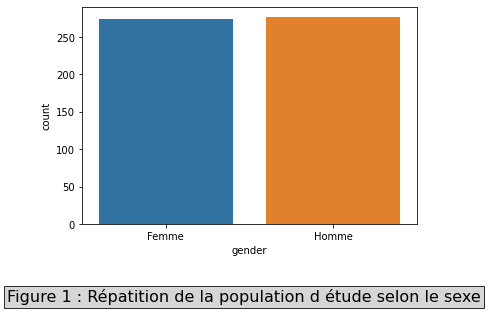

In [8]:
sns.countplot(x='gender', data = dataset1)
plt.suptitle('Figure 1 : Répatition de la population d étude selon le sexe', fontsize = 16, x = 0.5, y = -0.1, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})
plt.draw()

## Notre échantillon se compose de 551 participants, 277 sont des hommes et 274 sont des femmes. On observe une bonne répartition selon le sexe. 

## 2. Selon l'âge :

In [9]:
dataset1['age'].unique()

array([21., 24., 25., 23., 22., 26., 27., 30., 28., nan, 29., 34., 35.,
       32., 39., 20., 19., 18., 37., 33., 36., 31., 42., 38., 55.])

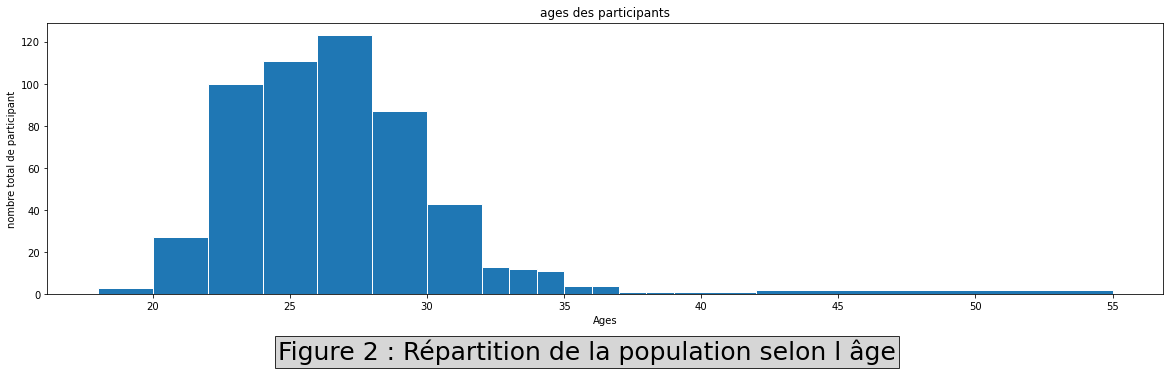

In [10]:
#Quelle est la répartition/étendue des âges de tous les participants ?


plt.figure(figsize=(20, 5))

#ajouter le titre
plt.title('ages des participants')

#ajouter des étiquettes pour les axes x et y
plt.xlabel('Ages')
plt.ylabel('nombre total de participant')

#interval choisi
bins = [18,20,22,24,26,28,30,32,33,34, 35,36,37,38,39,42,55]

#plot
plt.hist(dataset1.age,bins=bins,edgecolor='white')
plt.suptitle('Figure 2 : Répartition de la population selon l âge', fontsize = 25, x = 0.5, y = 0, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})
plt.show()

## La figure 2 nous montre que l'âge des participants est compris entre 18 et 55 ans et que la majorité des participants sont âgés de 22 à 30 ans.

## 3. Selon l'objectif principal de la participation au speed dating :

In [11]:
dataset1['goal'] = dataset1['goal'].apply(lambda x:
                              "Passer une soirée amusante" if x==1
                              else "Rencontrer de nouvelles personnes" if x == 2
                              else "Avoir un rendez-vous" if x==3
                              else "Chercher une relation sérieuse" if x==4 
                              else "Dire que je l'ai fait" if x==5 
                              else "Autre"
                                )                            

/tmp/ipykernel_300/3953298234.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Quel est votre objectif principal en participant à cet événement ? 
* Passer une soirée amusante=1
* Rencontrer de nouvelles personnes=2
* Pour avoir un rendez-vous=3
* Chercher une relation sérieuse=4
* Dire que je l'ai fait=5
* Autre=6

In [12]:
objectif_rencontre = dataset1['goal'].value_counts()
objectif_rencontre

Passer une soirée amusante           228
Rencontrer de nouvelles personnes    189
Avoir un rendez-vous                  40
Autre                                 37
Dire que je l'ai fait                 35
Chercher une relation sérieuse        22
Name: goal, dtype: int64

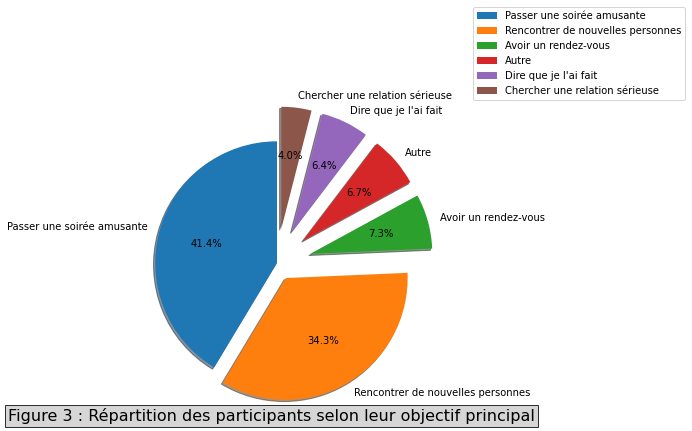

In [13]:
plt.figure()
plt.pie(objectif_rencontre.values, labels=objectif_rencontre.index,  
       autopct='%1.1f%%',                  # ajouter % au nombre
       shadow=True,                        # mettre des ombres en desous des camembert
       startangle=90,                      # faire pivoter la figure
       explode=(0, 0.2, 0.4, 0.4, 0.4, 0.4),                    # eclater la figure
       radius=1.4                          # agrandir la figure
       )
plt.legend(bbox_to_anchor=(2.4, 1.7))     # rajouté une legende
plt.suptitle("Figure 3 : Répartition des participants selon leur objectif principal", fontsize = 16, x = 0.5, y = 0, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})
plt.show()


## Le graphique ci-dessus montre que la majorité des participants (41.4%) cherche à passer une soirée amusante ou à rencontrer de nouvelles personnes (34.3%) et que seul 11.3% cherchent une relation sérieuse ou décrocher un rendez-vous.

## - Répartition des ojectifs selon le sexe

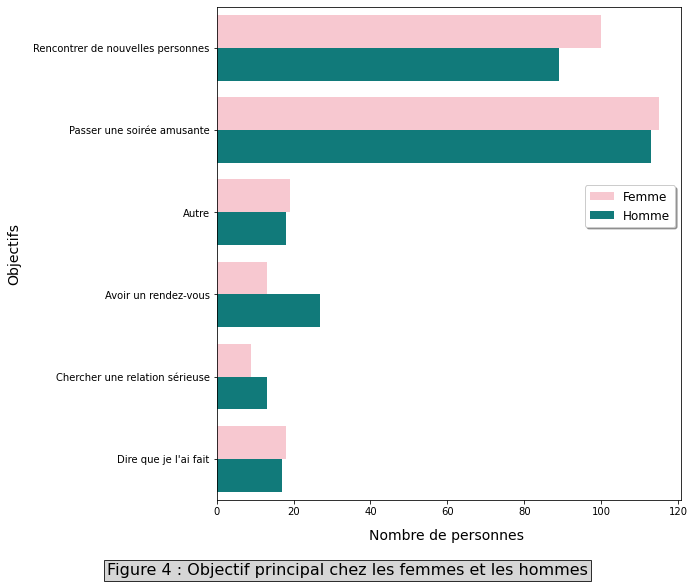

In [14]:
fig, axes = plt.subplots(1, figsize=(10,8))

sns.countplot(y='goal',data=dataset1, hue='gender', palette=['pink','darkcyan'])
#axes.set(yticklabels= 'goal')
axes.set_xlabel("Nombre de personnes ",labelpad = 12, fontsize = 14)
axes.set_ylabel("Objectifs",labelpad = 12, fontsize = 14)
axes.legend(bbox_to_anchor=(1, 0.65), fontsize= 12, ncol=1, shadow=True)

plt.tight_layout(pad=2.0)
plt.suptitle("Figure 4 : Objectif principal chez les femmes et les hommes", fontsize = 16, x = 0.5, y = 0, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})
plt.show()

## La figure 4 montre qu'il y a plus d'hommes que de femmes qui cherchent à décrocher un rendez vous ou à avoir une relation sérieuse.


# II. Les facteurs suceptibles d'influencer les dates :

# 1. L'âge

In [15]:
#Comme la colonne "date" est graduée de 7 à 1, nous allons inverser l'échelle pour voir à quelle fréquence les gens vont à des rendez-vous.
#"Presque jamais" sera égal à 1 au lieu de 7.

dataset1['date11'] = dataset1['date'].apply(lambda x : 1 if x == 7
                                                 else 2 if x == 6
                                                 else 3 if x == 5
                                                 else 4 if x == 4
                                                 else 5 if x == 3
                                                 else 6 if x == 2
                                                 else 7)
dataset1['date11']

/tmp/ipykernel_300/1382066965.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       1
10      3
20      5
30      3
40      4
       ..
8268    2
8290    1
8312    4
8334    2
8356    6
Name: date11, Length: 551, dtype: int64

/tmp/ipykernel_300/1339806864.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



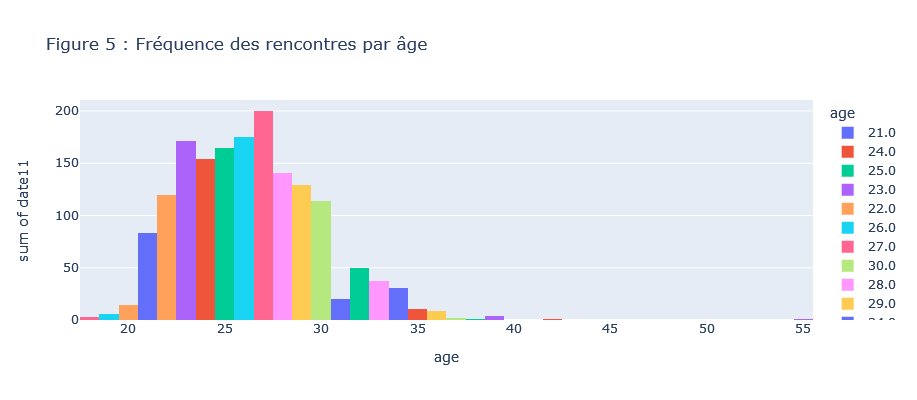

In [45]:
# Suppression des valeurs Na pour colorer notre graphique.

dataset1.dropna(how = 'any', subset = ['age'], inplace = True)

#Fréquence des rendez-vous pour chaque carrière envisagée

px.histogram(data_frame= dataset1.drop_duplicates('iid'),
             x = 'age', 
             y = 'date11',
             color = 'age',
            title = 'Figure 5 : Fréquence des rencontres par âge',width=600, height=400,).update_yaxes(categoryorder = 'total ascending') #Classement des catégories selon la fréquence des rencontres


## Nous constatons que les paticipants qui ont le plus de dates sont d'âge compris entre 23 et 27 ans.

# 2. La religion

## Les participants ont été questionnés sur le niveau d'importance de la religion dans le choix de leurs partenaires.

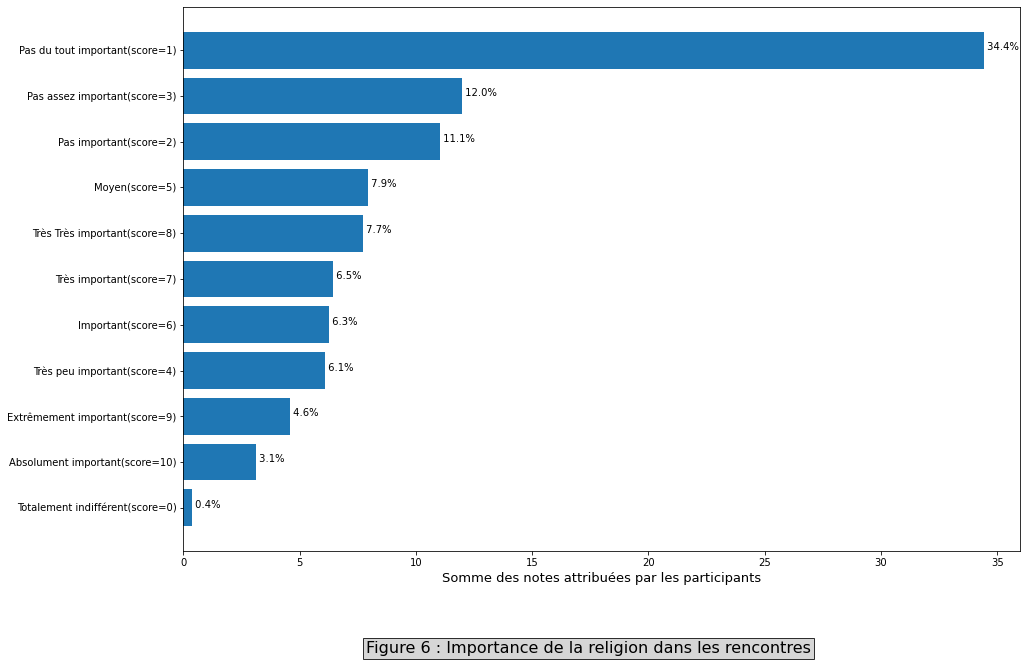

In [17]:
imprace = dataset1["imprace"].apply(lambda x: "Absolument important(score=10)" if x==10
                                else "Extrêmement important(score=9)" if x ==9
                                else "Très Très important(score=8)" if x==8
                                else "Très important(score=7)" if x ==7
                                else "Important(score=6)" if x==6
                                else "Moyen(score=5)" if x==5
                                else "Très peu important(score=4)" if x==4
                                else "Pas assez important(score=3)" if x==3
                                else "Pas important(score=2)" if x==2
                                else "Pas du tout important(score=1)" if x ==1
                                else "Totalement indifférent(score=0)")
imprace_count = imprace.value_counts("imprace", ascending = True )
s = np.sum(imprace_count.values)
repartition = [np.round(element/s*100,2) for element in imprace_count.values]

plt.figure(figsize=(15,10))
plt.barh(imprace_count.index, repartition)
plt.suptitle("Figure 6 : Importance de la religion dans les rencontres", fontsize = 16, x = 0.5, y = 0, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})
plt.xlabel("Somme des notes attribuées par les participants", fontsize= 13)
for i in range(len(repartition)):
    plt.text(repartition[i], imprace_count.index[i],' {:.1f}%'.format(repartition[i]))
plt.xlim(0, 36)
plt.show()

## Après analyse des réponses des participants (figure 6), nous avons contaté que plus de la moitié des participants (63.6%) trouvent que la religion n'est pas ou très peu importante dans le choix du partenaire.

# 3. Les attributs

## Voyons quels sont les attributs sur lesquels se basent les participants pour choisir un partenaire.

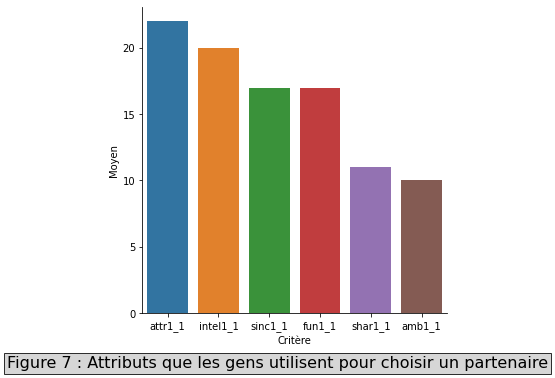

In [18]:
#Critères d'importance en général (hommes et femmes confondus) trié par ordre décroissant
df1 = dataset[["attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]].mean().astype(int).sort_values(ascending = False).reset_index().rename(columns={'index':"Critère", 0:"Moyen"})

import seaborn as sns
sns.catplot(data = df1, x = 'Critère', y = "Moyen", kind="bar")
plt.suptitle("Figure 7 : Attributs que les gens utilisent pour choisir un partenaire", fontsize = 16, x = 0.5, y = 0, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})

plt.draw()

## La figure 7 montre que l'apparence ou l'attractivité du partenaire est le critère dominant dans le choix du partenaire suivi par l'intelligence. Le critère le moins important est l'ambition.

## - Regardons maintenant la répartition de l'importance des attributs chez les hommes et les femmes :

In [19]:
# Renommer les colonnes avec des attributs

dataset2 = dataset.rename(columns = {'attr1_1' : 'attractivité', 
                                              'sinc1_1' : 'sincérité', 
                                              'intel1_1' : 'intelligence',
                                              'fun1_1' : 'humour',
                                              'amb1_1' : 'amtition',
                                              'shar1_1' : 'a des intérêts communs'})

In [20]:
#Vagues 6 à 9 (1=pas du tout important, 10=extrêmement important) :

vague6_9 = dataset2[dataset2['id'].between(6,9)]

attributes_list = ['attractivité', 'sincérité', 'intelligence',
                   'humour', 'amtition', 'a des intérêts communs']

In [21]:
vague6_9.groupby('gender')[attributes_list].sum()

,attractivité,sincérité,intelligence,humour,amtition,a des intérêts communs
gender,,,,,,
0,17774.70,17158.88,18838.18,16426.72,12642.52,11638.90
1,26017.24,17222.12,21544.32,18927.16,9173.45,10585.74


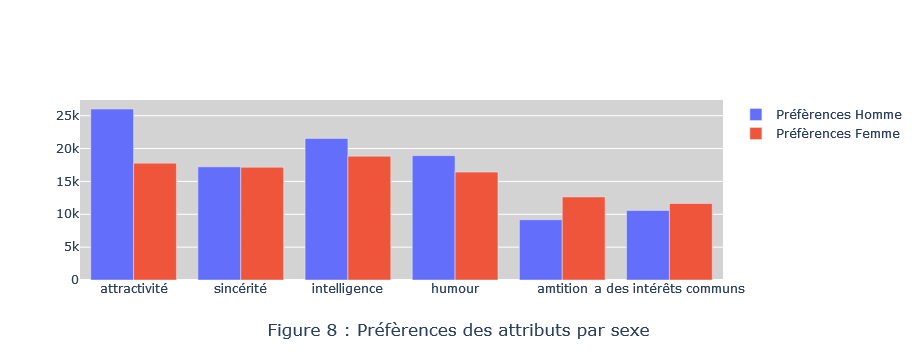

In [22]:
fig = go.Figure(data=[
    go.Bar(name='Préfèrences Homme', 
           x = attributes_list, 
           y=vague6_9.groupby('gender')[attributes_list].sum().values[1]),
    go.Bar(name='Préfèrences Femme', 
           x = attributes_list, 
           y=vague6_9.groupby('gender')[attributes_list].sum().values[0])
])

# Changer le mode de barre

fig.update_layout(title={
                  'text': "Figure 8 : Préfèrences des attributs par sexe",
                  'y':0.1,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  barmode='group', 
                  plot_bgcolor='lightgrey',
                 )
fig.show()

## La figure ci-dessus montre que l'attribut le plus important dans le choix d'un partenaire chez les hommes est "l'attrait" (puis l'intelligence et l'humour), alors que le critère le plus important pour les femmes dans le choix d'un homme est l'intelligence (puis l'attrait et la sincérité).

## 4. Domaine d'étude ou fomation

In [23]:
# field : domaine d'étude

In [24]:
# field code
dataset3 = dataset 
col = ["field_cd"]
dataset3[col] = dataset[col].replace({1 : "Avocat",
                            2 : "Math",
                            3 : "Sciences sociales, Psychologue",
                            4 : "Sciences médicales, pharmaceutiques et biotech",
                            5 : "Ingénierie",
                            6 : "Anglais/Écriture Créative/Journalisme",
                            7 : "Histoire/Religion/Philosophie",
                            8 : "Entreprise/Finance",
                            9 : "Éducation, Académie",
                            10 : "Sciences Biologiques/Chimie/Physique",
                            11 : "Travail Social",
                            12 : "Undergrad/indécis",
                            13 : "Science politique/Affaires internationales",
                            14 : "Cinéma",
                            15 : "Administration des Arts",
                            16 : "Langues",
                            17 : "Architecture",
                            18 : "Autre"})

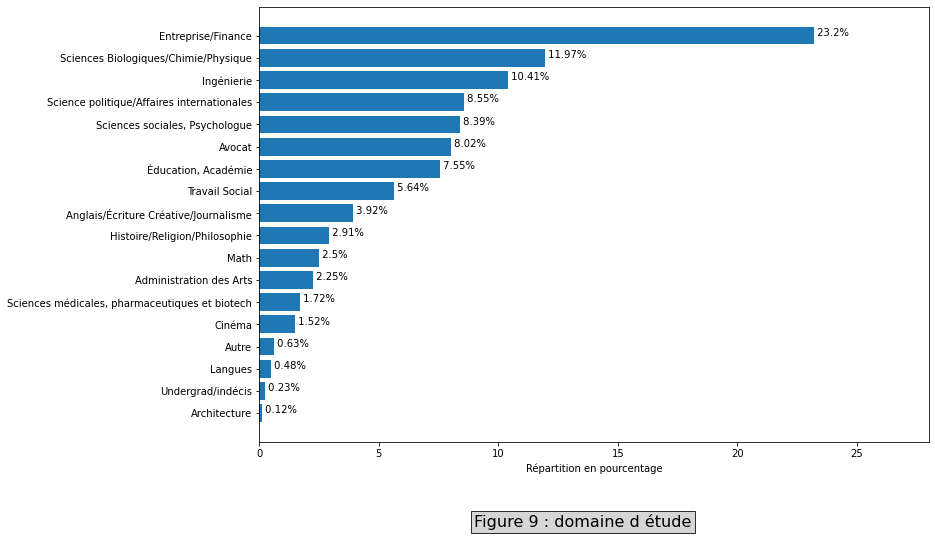

In [25]:
job = dataset3.value_counts("field_cd", ascending = True )
s = np.sum(job.values)
repartition = [np.round(element/s*100,2) for element in job.values]

plt.figure(figsize=(12,8))
plt.suptitle("Figure 9 : domaine d étude",fontsize = 16, x = 0.5, y = 0, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})
plt.barh(job.index, repartition)
plt.xlabel("Répartition en pourcentage")
for i in range(len(repartition)):
    plt.text(repartition[i], job.index[i],' {}%'.format(repartition[i]))
    
plt.xlim(0, 28)
plt.show()

## Nous constatons que la pluart des participants ont fait ou font des études poussées et que le domaine de formation le plus présenté est la finance suivi par les sciences biologiques/chimie/physique et l'ingénierie.

# 5. La profession

In [26]:
# career_c : profession personne

In [27]:
# field code
dataset3 = dataset 
col = ["career_c"]
dataset3[col] = dataset[col].replace({1 : "Avocat",
                            2 : "universitaire/recherche",
                            3 : "Psychologue",
                            4 : "médecin/médecine",
                            5 : "Ingénierie",
                            6 : "arts créatifs/divertissement",
                            7 : "banque/affaires/ PDG/entrepreneur",
                            8 : "Immobilier",
                            9 : "humanitaires",
                            10 : "Indécis",
                            11 : "Travail Social",
                            12 : "Pathologie vocale",
                            13 : "politique",
                            14 : "Sport professionnel/Athléte",
                            15 : "Autre",
                            16 : "Journalisme",
                            17 : "Architecture"})

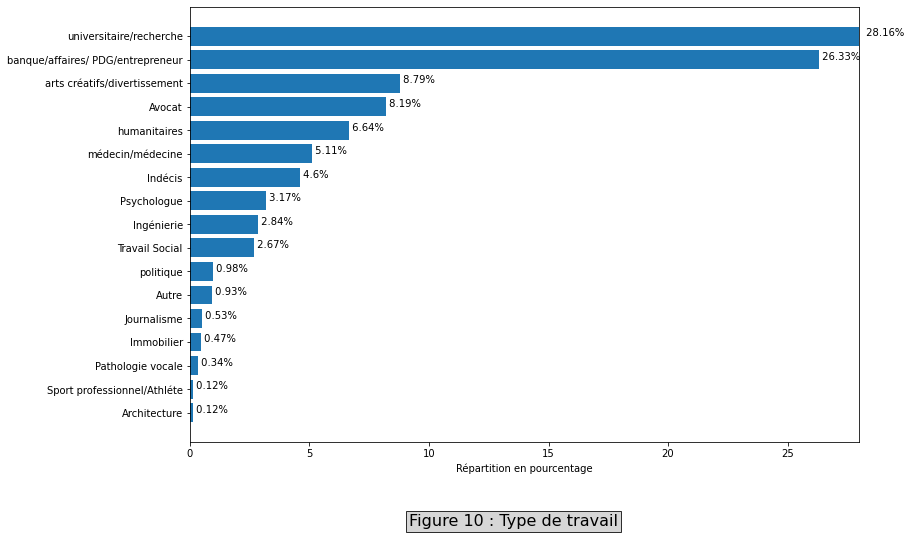

In [28]:
job1 = dataset3.value_counts("career_c", ascending = True )
s = np.sum(job1.values)
repartition1 = [np.round(element/s*100,2) for element in job1.values]

plt.figure(figsize=(12,8))
plt.suptitle("Figure 10 : Type de travail",fontsize = 16, x = 0.5, y = 0, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})
plt.barh(job1.index, repartition1)
plt.xlabel("Répartition en pourcentage")
for i in range(len(repartition1)):
    plt.text(repartition1[i], job1.index[i],' {}%'.format(repartition1[i]))
    
plt.xlim(0, 28)
plt.show()

## Nous constatons que la plupart des participants travaillent dans la recherche, dans les banques ou entant que PDG.

# 6. L'origine ethnique

## - Les diffèrentes origines ethniques des participants.

In [29]:
# race
col1 = ["race", "race_o"]
dataset3[col1] = dataset1[col1].replace({1 : "Africaine",
                            2 : "Caucasienne",
                            3 : "Latino",
                            4 : "Asiatique",
                            5 : "Indien d'Amérique",
                            6 : "Autre"})

In [30]:
dtaset4 = dataset3.groupby(["race", "race_o"])["iid"].count()
dtaset4 = dtaset4.reset_index()
dtaset4 = dtaset4.rename(columns = {'iid':'count'})
dtaset4.head(5)

,race,race_o,count
0,Africaine,Asiatique,7
1,Africaine,Autre,1
2,Africaine,Caucasienne,16
3,Africaine,Latino,2
4,Asiatique,Asiatique,56


In [31]:
datapivot = dtaset4.pivot("race", "race_o", "count")

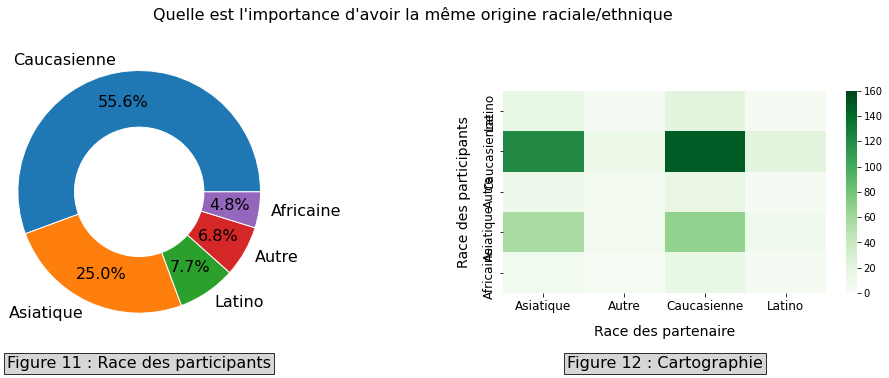

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
explode = (0.05,0.05,0.05,0.05,0.05)

axes[0].pie(dataset3["race"].value_counts().values, radius = 1.5, labels = dataset3["race"].value_counts().index, 
        autopct='%1.1f%%', wedgeprops=dict(width=0.7, edgecolor='w'), startangle=0, pctdistance=0.75,  textprops={'fontsize': 16})
axes[0].set_title("Figure 11 : Race des participants", fontsize = 16, x = 0.5, y = -0.4, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})

fig.suptitle("Quelle est l'ethnie ?", fontsize=16)



sns.heatmap(datapivot, annot=False, cmap = "Greens", fmt='.1f', vmin=0, vmax=160, ax = axes[1]).invert_yaxis()
axes[1].set_title("Figure 12 : Cartographie", fontsize = 16, x = 0.5, y = -0.4, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})
axes[1].set_xlabel("Race des partenaire",labelpad = 12, fontsize = 14)
axes[1].set_ylabel("Race des participants",labelpad = 12, fontsize = 14)
axes[1].tick_params(colors='black', labelsize=12)


fig.suptitle("Quelle est l'importance d'avoir la même origine raciale/ethnique", fontsize=16)

plt.tight_layout(pad=1.0)
plt.show()

## D'après les figures 11 et 12, nous pouvons constater que l'origine ethnique Caucasienne (49,5%) est la plus importante dans notre population d'étude suivie par l'Asiatique (38,7%). Aussi, les participants d'origine ethnique causasienne préfèrent plus avoir des partenaires qui ont la même origine ethnique. Il y a aussi des rencontres assez importantes entre des asiatiques et des caucasiens et entre asiatiques. 

# 7. Les loisirs

### Les participants, hommes et femmes, ont été interrogés sur leurs loisirs.

In [33]:
cols = ["gender", "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", 
            "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]
dataset4 = dataset1[cols]

In [34]:
hobby = ["sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", 
            "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]
            
activities = dataset4.groupby('gender')[hobby].mean()
activities

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
gender,,,,,,,,,,,,,,,,,
Femme,5.738806,4.126866,6.395522,8.149254,7.444030,7.212687,5.932836,3.246269,5.902985,7.902985,5.731343,7.500000,8.145522,7.152985,8.037313,6.492537,5.078358
Homme,7.054745,4.978102,6.197080,7.405109,6.514599,6.171533,5.565693,4.441606,5.591241,7.386861,4.930657,6.036496,7.656934,6.543796,7.715328,4.744526,3.759124


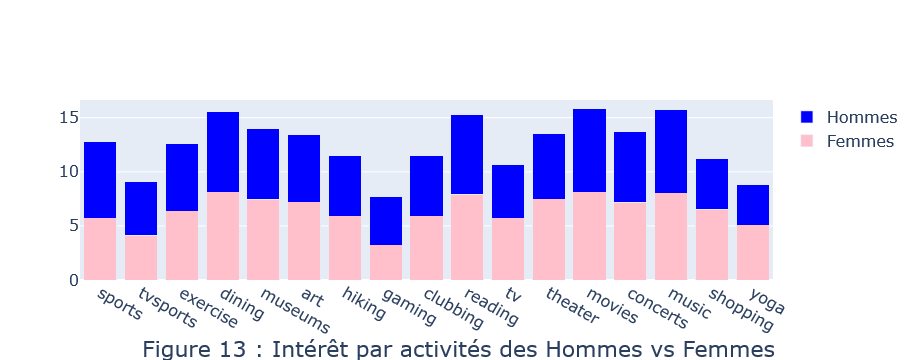

In [35]:
trace0 = go.Bar(
    x=activities.columns.values,
    y=activities.iloc[0],
    name='Femmes',
    marker=dict(
    color='pink'
    )
)
trace1 = go.Bar(
    x=activities.columns.values,
    y=activities.iloc[1],
    name='Hommes',
    marker=dict(
    color='blue'
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title={
                  'text': "Figure 13 : Intérêt par activités des Hommes vs Femmes",
                  'y':0.05,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
    font=dict(
        size=16
    ),
    barmode = 'stack',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

## L'analyse des résultats montre que les loisirs les plus représentés chez les deux sexes sont : Aller dîner au restaurant, regarder des films (cinéma), écouter de la musique et lecture .

## - Nombre de sorties pour qu'il y ait correspondance entre le participant et le partenaire. 

In [36]:
freq_sortie = dataset1.groupby(["go_out", "match"])["iid"].count()
freq_sortie = freq_sortie.reset_index()
freq_sortie = freq_sortie.rename(columns = {'iid':'count'})
density = freq_sortie.pivot("go_out", "match", "count")

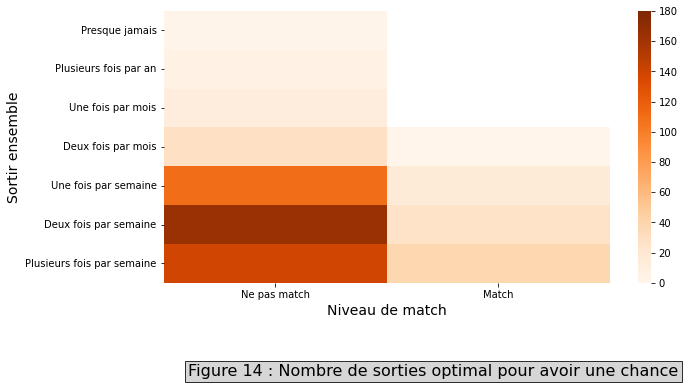

In [37]:
plt.figure(figsize=(10,5))
x_axis_labels = ["Ne pas match", "Match"] # labels for x-axis
y_axis_labels = ["Plusieurs fois par semaine", "Deux fois par semaine", "Une fois par semaine", "Deux fois par mois",
                    "Une fois par mois", "Plusieurs fois par an", "Presque jamais" ] # labels for y-axis
sns.heatmap(density, annot=False, cmap = "Oranges", vmin=0, vmax=180, xticklabels=x_axis_labels, yticklabels=y_axis_labels).invert_yaxis()
plt.xlabel("Niveau de match", fontsize = 14)
plt.ylabel("Sortir ensemble",  fontsize = 14)
plt.suptitle("Figure 14 : Nombre de sorties optimal pour avoir une chance",fontsize = 16, x = 0.5, y = -0.1, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})
plt.show()

## Pour obtenir un match ou pour dire que deux partenaire sont compatibles, les participants pensent qu'un couple doit sortir ensemble au moins deux fois par mois. 

# 8. Ressenti des participants et rendez-vous obtenus : 
## - Sur les 20 personnes que vous allez rencontrer, combien pensez-vous qu'elles seront intéressées par un rendez-vous avec vous ? 

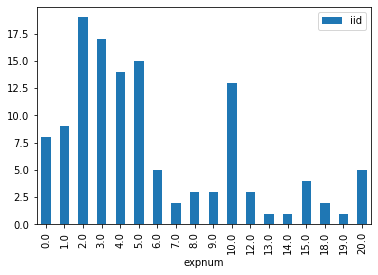

In [38]:
d=(
dataset1
.groupby("expnum")
    [["iid"]]
.count()
).plot.bar()

### "Figure 15 : Ressentie des participants"

## La majorité des  participants s'attend à avoir 2 à 5 rendez-vous réels après l'expérience du speed dating.

# - Les rdv obtenus.

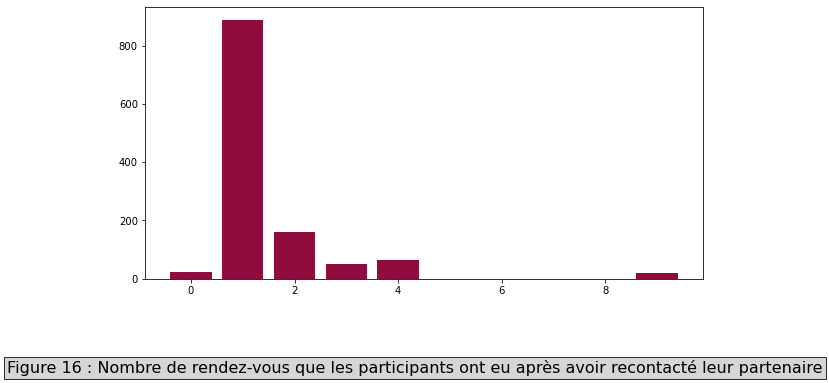

In [39]:
# date_3 : Avez-vous eu un rendez-vous avec l'un de vos correspondants ?
# numdat_3 : Avec combien de vos partenaires êtes-vous sorti(e) jusqu'à présent ?


plt.figure(figsize = (10,5))

plt.bar(dataset2[dataset2['date_3']==1].groupby(['numdat_3'])['iid'].count().reset_index()['numdat_3'],
        dataset2[dataset2['date_3']==1].groupby(['numdat_3'])['iid'].count().reset_index()['iid'], color='#900C3F',
               width= 0.8, align='center')
plt.suptitle("Figure 16 : Nombre de rendez-vous que les participants ont eu après avoir recontacté leur partenaire",fontsize = 16, x = 0.5, y = -0.1, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})

plt.show()

## La plupart des participants n'ont eu qu'un seul rdv après le speed dating.

### - La fonction "dec" donne la décision du participant après le délai de 4 minutes. Si les deux participants ont dit oui, une correspondance est enregistrée.

#### Rappel : Oui --> 1 et Non -->0

In [40]:
#Encodez les réponses à cette question 

replace_map2 = {'dec': {1: "Oui", 0: "Non"}}
dataset2=dataset.replace(replace_map2)

In [41]:
dataset2.groupby(['gender','dec'])['iid'].count().reset_index()

,gender,dec,iid
0,0,Non,2655
1,0,Oui,1529
2,1,Non,2205
3,1,Oui,1989


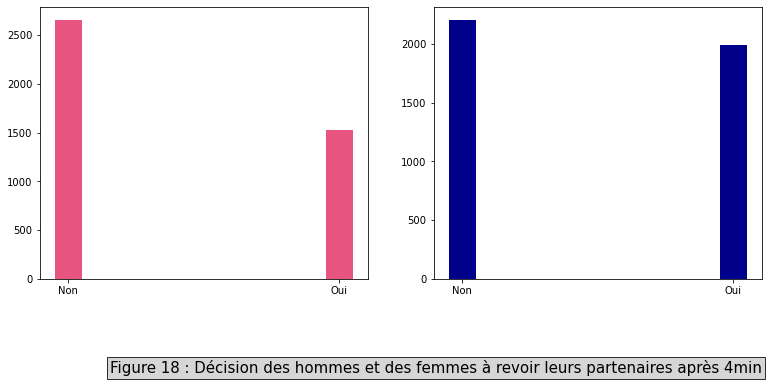

In [42]:
plt.figure(figsize = (20,5))

plt.subplot(131)


plt.bar(dataset2[dataset2['gender']==0].groupby(['dec'])['iid'].count().reset_index()['dec'], 
        dataset2[dataset2['gender']==0].groupby(['dec'])['iid'].count().reset_index()['iid'], color="#E75480",
        width= 0.1, align='center')

plt.subplot(132)

plt.bar(dataset2[dataset2['gender']==1].groupby(['dec'])['iid'].count().reset_index()['dec'],
        dataset2[dataset2['gender']==1].groupby(['dec'])['iid'].count().reset_index()['iid'], color="darkblue",
               width= 0.1, align='center')
plt.suptitle("Figure 18 : Décision des hommes et des femmes à revoir leurs partenaires après 4min",fontsize = 15, x = 0.4, y = -0.1, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})

plt.show()

## Nous remarquons qu'il y a plus de refus de la part des femmes que des hommes.

## -Taux de satisfaction.

Text(0.5, -0.1, 'Figure 19 : Taux de satisfaction des participants')

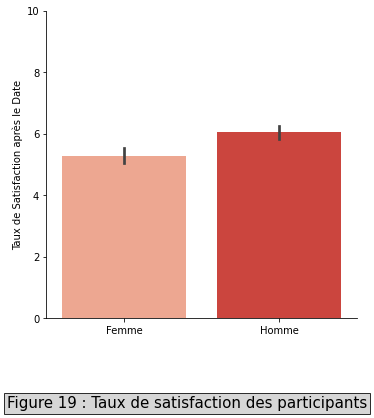

In [43]:
#Taux de satisfaction Homme vs Femmes

Graph = sns.catplot(x="gender", y="satis_2", data=dataset1, kind="bar", palette="Reds" )
Graph.set_axis_labels("", "Taux de Satisfaction après le Date").set_xticklabels(["Femme", "Homme"]).set(ylim=(0, 10))
plt.suptitle("Figure 19 : Taux de satisfaction des participants",fontsize = 15, x = 0.5, y = -0.1, bbox={'facecolor':'0.8', 'pad':3, 'alpha':0.8})



## La figure ci-dessus montre que les hommes sont légèrement plus satisfaits de leur date que les femmes.

# Conclusion 
## Le speed dating est un événement qui intéresse aussi bien les hommes que les femmes de différents âges allant de 18 à 55 ans. Notre analyse a montré que les femmes sont plus difficiles à satisfaire et que ces dernières sont à l'origine de plus de refus de revoir un partenaire après un seed dating. 
## Aussi, pour avoir plus de chance pour décrocher des rendez-vous et trouver l'âme soeur après le speed dating,  vous devriez :
### - Etre jeune (les personnes qui ont le plus de rendez-vous sont âgées de 23 à 27 ans),
### - Etre séduisant et intelligent,
### - Avoir une origine ethnique caucasienne ou asiatique,
### - Aimer dîner au restaurant, regarder des films, écouter de la musique et/ou lire.
### - Sortir avec votre partenaire autant de fois que possible. 


